In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
netflix_dataset=pd.read_csv(r"C:\csv files\combined_data_1.txt",header=None,names=['Cust_Id','Ratings'],usecols=[0,1])

In [3]:
netflix_dataset

,Cust_Id,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Ratings  float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


# I. Finding Total movies in dataset

In [5]:
 movies_count = netflix_dataset['Ratings'].isna().sum()

In [6]:
movies_count

4499

# II. No of unique reviewer

In [7]:
customer_count = netflix_dataset['Cust_Id'].nunique() - movies_count
customer_count

470758

In [8]:
stars = netflix_dataset.groupby('Ratings').count()
stars

,Cust_Id
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


<Axes: ylabel='Ratings'>

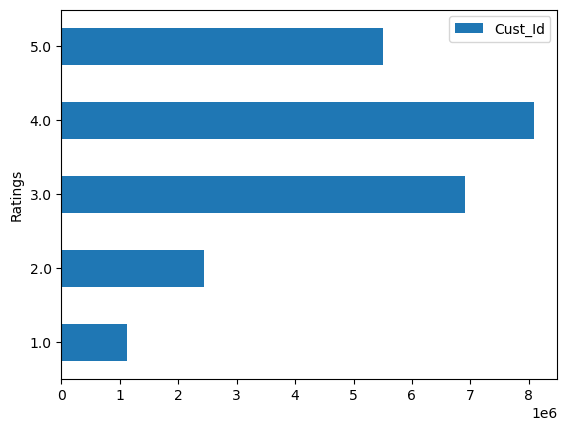

In [9]:
stars.plot(kind='barh')

In [10]:
# Now we wanna make a another column in dataset which tells about Movie ID

In [11]:
df_nan = pd.DataFrame(netflix_dataset['Ratings'].isna())

In [12]:
df_nan

,Ratings
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [13]:
df_nan[df_nan['Ratings'] == True].shape

(4499, 1)

In [14]:
df_nan = df_nan[df_nan['Ratings'] == True]
df_nan

,Ratings
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [15]:
df_nan=df_nan.reset_index()
df_nan

,index,Ratings
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [16]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [17]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [18]:
movie_np = []
movie_id = 1

for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp = np.full((1, i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

In [19]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.498e+03, 4.498e+03,
       4.498e+03])

In [22]:
# 4499 movie id not filled
movie_id 

4499

In [20]:
movie_np.shape[0]

24053336

In [21]:
netflix_dataset.shape[0]

24058263

In [22]:
netflix_dataset.shape[0] - movie_np.shape[0] - movies_count

428

In [23]:
df_nan.iloc[-1,0]

24057834

In [24]:
last_record = np.full((1,len(netflix_dataset) - df_nan.iloc[-1,0] -1), movie_id)
movie_np = np.append(movie_np, last_record)

In [25]:
print(len(movie_np))

24053764


In [26]:
len(netflix_dataset)-len(movie_np) 

4499

In [27]:
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Ratings'])]

In [28]:
netflix_dataset

,Cust_Id,Ratings
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [29]:
netflix_dataset['Movie_Id'] = movie_np.astype('int')
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype('int')

C:\Users\punit\AppData\Local\Temp\ipykernel_5588\3654657224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id'] = movie_np.astype('int')
C:\Users\punit\AppData\Local\Temp\ipykernel_5588\3654657224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype('int')


In [30]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int32  
 1   Ratings   float64
 2   Movie_Id  int32  
dtypes: float64(1), int32(2)
memory usage: 550.5 MB


In [31]:
netflix_dataset.head(15)

,Cust_Id,Ratings,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1
7,124105,4.0,1
8,1248029,3.0,1
9,1842128,4.0,1
10,2238063,3.0,1


In [32]:
netflix_dataset.tail(20)

,Cust_Id,Ratings,Movie_Id
24058243,1061120,3.0,4499
24058244,1852040,1.0,4499
24058245,268846,4.0,4499
24058246,2368103,2.0,4499
24058247,529787,4.0,4499
24058248,441248,4.0,4499
24058249,2092745,5.0,4499
24058250,555962,5.0,4499
24058251,303969,2.0,4499
24058252,654591,3.0,4499


In [33]:
f = ['count', 'mean']

In [34]:
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Ratings'].agg(f)

In [35]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [36]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.75))
movie_benchmark

2538

In [37]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3374)

In [38]:
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Ratings'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [39]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [40]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=327300)

In [41]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print("The dataset after dropping/ trimming is ",netflix_dataset.shape)

The dataset after dropping/ trimming is  (16939081, 3)


In [42]:
df_title=pd.read_csv(r"C:\csv files\movie_titles (1).csv",encoding='ISO-8859-1',header=None,usecols=[0,1,2],names=['Movie_Id','Year','Name'])

In [43]:
df_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [63]:
df_title.set_index('Movie_Id', inplace = True)

In [69]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [44]:
df_title.shape

(17770, 3)

In [45]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_Id  17770 non-null  int64  
 1   Year      17763 non-null  float64
 2   Name      17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [46]:
# Model Building for recommendation

import math
import seaborn as sns
from surprise import  Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [47]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Ratings']][:100000], reader)

In [50]:
# Use the SVD algorithm.
svd = SVD()

In [51]:
cross_validate(svd, data, measures = ['RMSE', 'MAE'], verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9976  0.9949  0.9976  1.0003  0.9979  0.9977  0.0017  
MAE (testset)     0.7965  0.7902  0.7971  0.7986  0.8033  0.7971  0.0042  
Fit time          1.16    1.05    1.08    1.08    1.09    1.09    0.04    
Test time         0.13    0.11    0.11    0.11    0.23    0.14    0.05    


{'test_rmse': array([0.99762809, 0.99494482, 0.99757687, 1.00027539, 0.99786878]),
 'test_mae': array([0.79647934, 0.79016745, 0.7970993 , 0.79855687, 0.8032994 ]),
 'fit_time': (1.1562690734863281,
  1.0472862720489502,
  1.0783662796020508,
  1.0780582427978516,
  1.094078540802002),
 'test_time': (0.13067245483398438,
  0.10955214500427246,
  0.10965275764465332,
  0.10937380790710449,
  0.23444128036499023)}

# To find all the movies rated as 5 stars by user with userId = 1829027

In [65]:
dataset_1829027=netflix_dataset[(netflix_dataset['Cust_Id']==1829027)&(netflix_dataset['Ratings']==5)]
dataset_1829027 = dataset_1829027.set_index('Movie_Id')

In [66]:
dataset_1829027.head()

,Cust_Id,Ratings
Movie_Id,,
8,1829027,5.0
175,1829027,5.0
312,1829027,5.0
457,1829027,5.0
571,1829027,5.0


In [67]:
dataset_1829027.shape

(32, 2)

In [71]:
dataset_1829027 = dataset_1829027.join(df_title)['Name']

In [72]:
dataset_1829027.head(10)

Movie_Id
8                   What the #$*! Do We Know!?
175                             Reservoir Dogs
312                              High Fidelity
457                          Kill Bill: Vol. 2
571                            American Beauty
886                                        Ray
918     A Hard Day's Night: Collector's Series
953                             Fahrenheit 451
1394                     Bringing Out the Dead
1399                                      1984
Name: Name, dtype: object

In [73]:
user_1829027=df_title.copy()
user_1829027.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [74]:
user_1829027=user_1829027.reset_index()
user_1829027

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [75]:
user_1829027 = user_1829027[~user_1829027['Movie_Id'].isin(drop_movie_list)]
user_1829027

,Movie_Id,Year,Name
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
25,26,2004.0,Never Die Alone
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [76]:
# getting full dataset
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Ratings']], reader)

In [77]:
#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

In [78]:
#Predict the ratings for user_1829027
user_1829027['Estimated_rating'] = user_1829027['Movie_Id'].apply(lambda x: svd.predict(1829027, x).est)

C:\Users\punit\AppData\Local\Temp\ipykernel_5588\4202390426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1829027['Estimated_rating'] = user_1829027['Movie_Id'].apply(lambda x: svd.predict(1829027, x).est)


In [79]:
user_1829027.head()

,Movie_Id,Year,Name,Estimated_rating
7,8,2004.0,What the #$*! Do We Know!?,4.328521
15,16,1996.0,Screamers,3.108121
16,17,2005.0,7 Seconds,2.934412
17,18,1994.0,Immortal Beloved,4.203363
25,26,2004.0,Never Die Alone,2.954349


In [81]:
#Drop extra columns from the user_1829027 data frame
user_1829027=user_1829027.drop(['Movie_Id'],axis=1)

In [82]:
# Sort predicted ratings for user_1829027 in descending order
user_1829027 = user_1829027.sort_values('Estimated_rating', ascending=False)

In [83]:
#Print top 10 recommendations
print(user_1829027.head(10))

        Year                                   Name  Estimated_rating
4344  2002.0                  Bowling for Columbine          4.908974
404   1987.0                        Wings of Desire          4.859136
174   1992.0                         Reservoir Dogs          4.778588
570   1999.0                        American Beauty          4.768331
1617  1984.0     Nausicaa of the Valley of the Wind          4.735153
1864  2004.0  Eternal Sunshine of the Spotless Mind          4.716001
3445  2002.0                          Spirited Away          4.711092
1973  1995.0                             Il Postino          4.710967
1475  2004.0               Six Feet Under: Season 4          4.703279
4352  2002.0         Curb Your Enthusiasm: Season 3          4.683027
